### 지도학습 > 분류 > 분류 결과에 대한 평가

#### 지표
- 정확도 ( accuracy )
 > 결과가 얼마나 정확하게 나누어졌는가?를 기준으로 분류기의 성능을 평가
 > 정확도 = 정답과 일치한 수 / 전체 데이터 수
 > 예) 수신된 메일이 100건, 분류기로 분류를 해보니 스팸이 60건으로 일치되어서 처리되었다, 정상은 40건 체크 => 60/100 => 60%
 > 무작위로 선택된 결과를 최저 성능으로 두는 방법

- 정밀도 ( precision )  
 > 출력 결과에서 정답을 얼마나 맞췄는지 나타내는 지표
 > 분류기가 스팸으로 판정한 메일들 중에, 진짜 스팸인 비율
 > 스팸 판정한 메일이 80개다, 이중 진짜가 55개다 => 55/80 = 0.6875
 > 많이 분류를 해내지 못하더라도, 더 정확한 예측을 중시한다면 정밀도를 선호한다!!! -> 스팸이 들어와도 좋으니, 반드시 받아야하는 메일을 스팸으로 잡히면 안된다!!!
 
- 재현율 ( recall )
 > 출력 결과가 실제 정답중에서 얼마나 맞추었는가?를 나타내는 지표
 > 전제 데이터에 포함된 실제 스팸(60건), 분류기가 스팸으로 판정한 개수(55건)의 비율 => 55/60 = 0.916
 > 현재 상황을 보면 재현율이 정밀도보다 1에 더 가까우므로, 재현율을 중시한다라고 이 분류기를 체크할 수 있다
 > 잘못 거르더라도, 스팸을 놓치지 않는다. 이런 경우 재현율을 중시!! -> 질병 -> 발생빈도가 낮은 질병이라도, 거짓 양성이 가끔 나오더라도 이런 환자는 재검사를 통해서 확진하면 되니깐, 문제가 없다 -> 이런 논리를 가진 문제!!! 

- F-점수, f1-score
 > 균형 잡힌 성능 평가 지표
 > 정밀도와 재현율의 상충 관계 => 평가에 반영하여, 실제 뷴류기를 비교할때 사용하는 지표
 > F-measure => 2 / ( (1/정밀도) + (1/재현율) ) = 2 / ( (1/0.68) + (1/0.92) ) = 0.782
 
 > 정밀도와 재현율이 균형을 이룰때, F-점수는 높아진다

- ROC 곡선 
 > 기준점에 따른 분류기의 성능을 시각화 하는 것
 > 거짓 양성비를 x축, 참 양성비를 y축으로 구성
 > 좌측 상단에 위치한 분류기가 가장 완벽한 분류기이다

- AUC 
 > ROC는 유용하나, 미세하게 성능들이 겹치면, 구분하기 어렵다, 평가가 힘들다
 > 이 성능을 수치화한 즉, 요약한 숫자가 필요
 > ROC 곡선 하단의 면적을 계산하는 AUC( area under curve )를 많이 사용한다
 > 성능이 좋으면 1에 가까워지고, 나쁘면 0.5 수준에 가까워진다
 > AUC가 0.9 이라고 한다면 => 참값을 가진 표본수가 거짓 표본보다 높은 점수를 줄 확률이 90%이다라고 해석

- 평가기준 -> 균형!!! 
 > 지표는 프로젝트나, 비즈니스상에 최소한의 품질을 확보하는 기준점
 > 이런 상황에서 나오는 문제점이 이 지표에 매몰되는 부분!!! -> 이 지표가 목적이 되버리는 문제가 발생(주의해야 한다)
 > 학습 모델의 성능을 높이는 부분과, 비즈니스의 목적을 달성하는 부분은 다르다

#### 관련개념 ( 분류쪽 얘기다 )

- 혼동행렬 ( confusion matrix )
 > 양성( 스팸이 맞음을 뜻함 ) -> 진짜 양성( True Positive : TP ) <-> 거짓 음성( False Negative : FN )
 > 음성( 스팸이 아님을 뜻함 ) -> 거짓 양성( False Positive : FP ) <-> 진짜 음성( True Negative : TN ) 

 > 메일은 총 100건, 실제 스팸 60건(일일이 확인한 것), 분류기가 판정한 스팸 80건, 그 중 진짜 스팸은 55건
 
                     예측결과
 -----------------------------------------------------------------------------------------
                     양성(스팸)                             음성(스팸 아님)
 실제 :               55                                       5(60-55)
 결과 :               25(80-55)                                15(20-5)
 
 - TP, FN, FP, TN 를 밑에 각각 붙여 보시오
 - 55        : 메일 100개중, 실제 스팸 60개, 분류기가 판정 80개, 그중 맞춘게 55개, TP
 - 25(80-55) : 분류기가 판정한 80개 그 중에 맞춘게 55개 틀린것인 25개, FP
 - 5(60-55)  : 실제 스팸이 60개 그 중에서 분류기가 맞춘게 55개 합이 틀린게 5개, FN
 - 15(20-5)  : 스팸이 아니라고 판정한게 20(100-80)개 그 중에 진짜 스팸인것 5개 이것을 뺀 15개, TN

 - 정밀도 = TP / ( TP + FP ) = 0.6875
  > 분류기가 분류한 스팸 중에 진짜 스팸이 얼마나 있는가?
  > 55/80 => 55 / (55+25) = 0.6875
  
 - 재현율 = TP / ( TP + FN ) = 0.916
  > 분류기가 분류한 스팸이 진짜 스팸 대비 얼마나 되는가?
  > 55/60 => 55 / (55+5) = 0.916
 
 - 정확도 = ( TP + TN ) / ( TP + FP + TN + FN ) = 0.7 
  > 분류기가 분류한 
  > ( 55 + 15 ) / ( 55 + 25 + 15 + 5 ) = 0.7
 
 => sklearn.metrics.confusion_matrix() 이 함수가 자동 계산 해준다 => 혼동행렬값을 계산해서 리턴해준다 => 이를 통해서 모델의 비교, 평가를 자동으로 수행할 수 있다
 [[ 55, 5 ]]
 [[ 25, 15 ]]
 
#### 다중 클레스 분류에서 클레스 전체의 평균을 구하는 방법
 - 마이크로 평균
  > 모든 클레스의 결과를 합쳐서 전체를 평가
  > 3개 클레스의 결과 -> TP1, FP1, TP2, FP2, TP3, FP3 이렇게 존재한다면
  > 정밀도( 마이크로 평균 ) = ( TP1 + TP2 + TP3 ) / ( TP1 + FP1 + TP2 + FP2 + TP3 + FP3 )
 
 - 매크로 평균
  > 전체 성능의 양상을 알기 위해 사용
  > 클레스별 정밀도를 획득
  > 정밀도( 매크로 평균 ) = ( 정밀도1 + 정밀도2 + 정밀도3 ) / 3
  



In [1]:
from matplotlib import pyplot as plt
import sklearn.datasets
import pandas as pd

In [20]:
# 아이리스 데이터 로드
def attach_iris_df():
    # 데이터 로드
    ds = sklearn.datasets.load_iris()
    #print(type(ds), ds['data']))
    # df 구성
    df = pd.DataFrame( ds['data'], columns=ds['feature_names'] )
    #print(df.head(2))
    
    #print(ds['target_names'])
    # 레이블데이터 컬럼명은 species
    # species라는 컬럼명을 추가하고, target_names의 값을 세팅하시오
    # 정답 데이터는 ds['target']이다
    # idx : 0~1~2
    # { 0:'setosa', ... }
    tmp = dict( zip( range(3), ds['target_names'] ) ) # 딕셔너리로 가야한다
    df['species'] = [ tmp[idx] for idx in ds['target'] ]
    
    #print(df.head(2))
    
    return df

In [22]:
df = attach_iris_df()
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [23]:
# roc, auc를 이용한 성능평가를 수행하기 위해 모듈 가져오기
import sklearn
# 측정 폐키지
from sklearn.metrics import roc_curve, auc
# 훈련용, 테스트용 분류
from sklearn.model_selection import train_test_split
# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [24]:
# 분류 알고리즘 별로 손쉽게 시각화를 하기 위해 값 세팅
class_map = { # 딕셔너리를 뺐다
    '로지스틱 회귀': ('-', LogisticRegression()),
    '결정 트리':     ('--',DecisionTreeClassifier(max_depth=5)),
    '랜덤 포레스트': ('.-',RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)),
    '나이브 베이즈': (':',GaussianNB())
    
}

In [25]:
df.shape

(150, 5)

In [28]:
# 데이터를 나눠서 임시 구성
# species를 제외하고 나머지만 150x4
X = df[ df.columns[:4] ]
X.shape

(150, 4)

In [41]:
set(df['species'])

{'setosa', 'versicolor', 'virginica'}

In [42]:
# Y는 이진 분류 데이터로 구성하겠다
# 종이 setosa 인가 아닌가로 구성
Y = df[ 'species' ] == 'versicolor'
Y[:2], type(Y), Y.shape

(0    False
 1    False
 Name: species, dtype: bool, pandas.core.series.Series, (150,))

In [43]:
# 데이터를 훈련용, 테스트용
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.8 ) # test_size: 구분 사이즈

In [44]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((30, 4), (120, 4), (30,), (120,))

In [45]:
for a in class_map.items():
    print(a) # 튜플형태로 나온다

('로지스틱 회귀', ('-', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)))
('결정 트리', ('--', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')))
('랜덤 포레스트', ('.-', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
      

In [46]:
from korea_font import initKoreaFontLoad
initKoreaFontLoad()

Malgun Gothic


로지스틱 회귀 auc : 0.6813651464814255 
결정 트리 auc : 0.8796436122017518 
랜덤 포레스트 auc : 0.9916943521594684 
나이브 베이즈 auc : 0.9758381153729989 


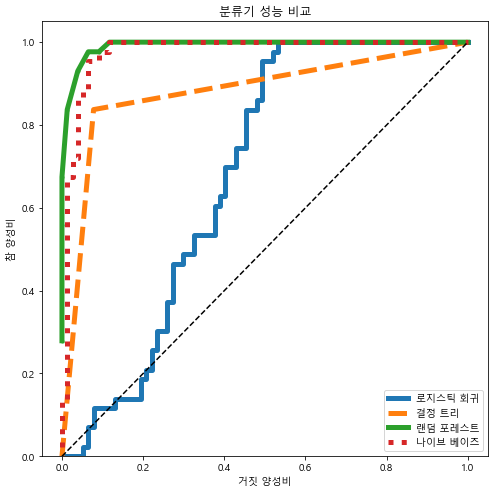

In [52]:
plt.figure( figsize=(8,8) )

for name, ( line_style, model ) in class_map.items():
    # 훈련
    model.fit( X_train, Y_train )
    # 예측
    # predict_proba(): 예측에 대한 확률로 예측 -> 알고리즘의 신뢰수준을 알수가 있어서 비교시 활용된다( 0, 1 중에 1이 될 확률 0.57이다 => 1을
    # 상대적으로 더 예측하는 모델인데, 만약 해당 모델이 0을 더 잘 맞춘다고 본다면
    # 예측값은 0으로 해석)
    # predict(): 예측값을 기준으로 예측
    preds = model.predict_proba( X_test )
    
    #print(preds[:2])
    # roc 커브
    pred = pd.Series( preds[:, 1] ) # 예측값 pred를 roc커브에 넣을때 형식을 맞춰줘야 해서 형식을 맞춰준다 
    
    # fpr        : 거짓 양성비( False positive rate)
    # tpr        : 참 양성비  ( True positive rate)
    # thresholds : fpr, tpr를 계산할 때 사용한 결정함수의 임계값
    fpr, tpr, thresholds = roc_curve( Y_test, pred ) # 이 값을 리턴해서주는 것이 3개가 있다
    # auc 스코어 => 곡선을 본다면, 수치적 비교가 안된다( 점들이 겹치고 난리나서 구분어려움 )
    auc_score = auc( fpr, tpr )
    print( '%s auc : %s ' % ( name, auc_score ) )
    # 그리기
    plt.plot( fpr, tpr, line_style, linewidth=5, label=name ) # x: fpr, y: tpr
    
plt.legend()
plt.title('분류기 성능 비교')
# 구분을 위해서 대각선 기울기가 1인 선을 드로잉
plt.plot( [0,1], [0,1], 'k--' )    

# 구간제한
plt.ylim( [0.0, 1.05] ) # lim: limit제한


# 라벨
plt.xlabel('거짓 양성비')
plt.ylabel('참 양성비')
plt.show()

In [48]:
# 메크로 평균, 마이크로 평균
from sklearn.metrics import f1_score
# 예를 들어
y_true = [ 0, 1, 2, 0, 1, 2 ] # 실제값
y_pred = [ 0, 2, 1, 0, 0, 1 ] # 예측값
# 메크로 평균 기반
# 정밀도 = 참의 개별값 합산 / ( 참의 개별값 합산 + 거짓의 개별값 합산 )
print(f1_score( y_true, y_pred, average= 'macro' )) # 정밀도를 판별하는 지표

0.26666666666666666


In [49]:
# 마이크로 평균 기반
# 정밀도 = ( 정밀도1 + 정밀도2 + ...) / n 개의 클레스 분류개수

print(f1_score( y_true, y_pred, average= 'micro' )) # macro 와 micro 의 가중치가 좀 차이가 난다 # 정밀도를 판별하는 지표

0.3333333333333333


In [50]:
print(f1_score( y_true, y_pred, average= 'weighted' )) # 정밀도를 판별하는 지표

0.26666666666666666


In [51]:
print(f1_score( y_true, y_pred, average= None )) # 정밀도를 판별하는 지표

[0.8 0.  0. ]


### 지도학습 > 회귀 > 회귀 모델에 대한 평가

#### 지표
##### 추천 시스템에서 체크
- 평균 제곱근 오차
- 결정계수

#### 기타 > A/B 테스트( 원리적으로는 머신러닝쪽, 실제는 웹쪽에서 사용됨 )

- 일반 s/w에서 테스트하는 방식을 혼용